In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [277]:
#carregando o arquivo no google colab
Banco_Dados = pd.read_csv('Startups in 2021 end.csv')

In [278]:
#dimensao 
Banco_Dados.shape

(936, 8)

In [279]:
#936 linhas e 8 colunas

In [280]:
#verificar o tipo de informação
Banco_Dados.info

<bound method DataFrame.info of      Unnamed: 0          Company Valuation ($B) Date Joined        Country  \
0             0        Bytedance           $140    4/7/2017          China   
1             1           SpaceX         $100.3   12/1/2012  United States   
2             2           Stripe            $95   1/23/2014  United States   
3             3           Klarna          $45.6  12/12/2011         Sweden   
4             4            Canva            $40    1/8/2018      Australia   
..          ...              ...            ...         ...            ...   
931         931        YipitData             $1   12/6/2021  United States   
932         932         Anyscale             $1   12/7/2021  United States   
933         933  Iodine Software             $1   12/1/2021  United States   
934         934       ReliaQuest             $1   12/1/2021  United States   
935         935       Pet Circle             $1   12/7/2021      Australia   

              City             

In [281]:
#primeiros registros
Banco_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [282]:
#colunas
Banco_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [283]:
#renomear colunas
Banco_Dados.rename( columns={    
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True) #sem o inplace, o programa nao altera o titulo das colunas
#ou seja, o inplace aplicara essas mudanças na base de dados de origem
Banco_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [284]:
#verificar o tipo de informação
#da para fazer com e sem parenteses
Banco_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [285]:
#resumo
# valor e data de adesao esta como texto, precisam ser alteradas para int/float e data, respectivamente
#alem disso, como são 936 entradas e existem colunas como nao nulos inferiores a esse valor, precisa ser visto

In [286]:
Banco_Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

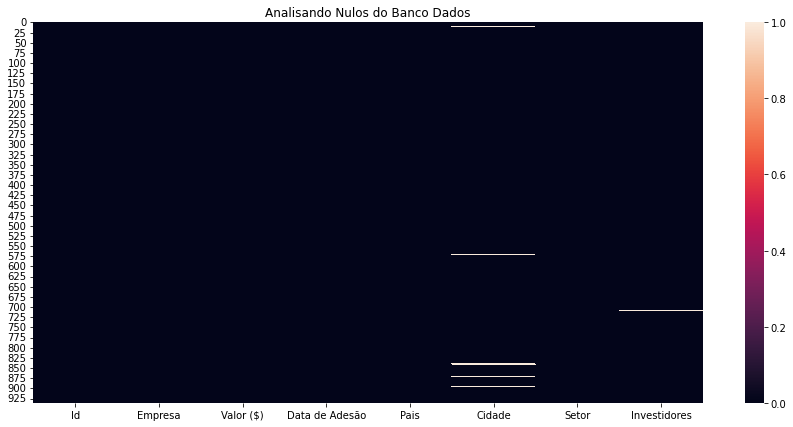

In [287]:
#fazendo grafico com os nulos de cima
plt.figure(figsize=(15,7))
plt.title('Analisando Nulos do Banco Dados')
sns.heatmap( Banco_Dados.isnull());

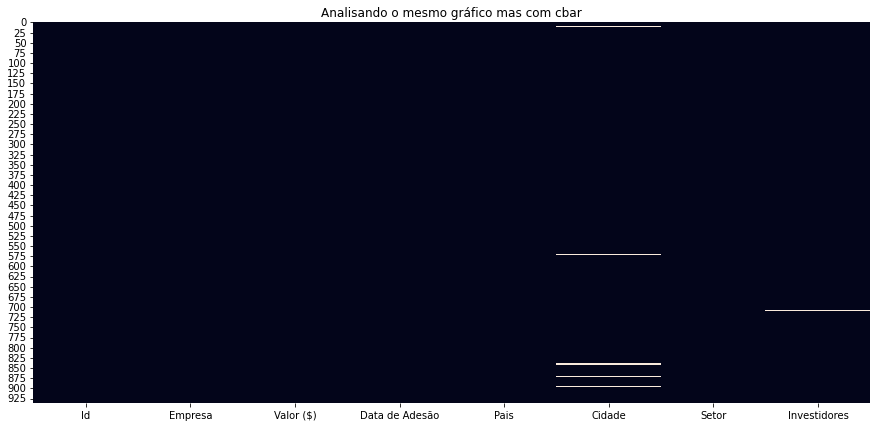

In [288]:
#mesmo grafico de cima, mas com cbar, que tira a legenda do heatmap
plt.figure(figsize=(15,7))
plt.title('Analisando o mesmo gráfico mas com cbar')
sns.heatmap( Banco_Dados.isnull(), cbar=False);

In [289]:
#verificando valores unicos unique
Banco_Dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [290]:
#contagem de valores unicos por coluna
Banco_Dados['Setor'].nunique()

17

In [291]:
#apresenta os valores unicos da coluna setor por meio de unique
Banco_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [292]:
#fazer a contagem de valores unicos para cada setor
Banco_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [293]:
#fazer a contagem de valores unicos para cada setor mas em percentual por meio de NORMALIZE dentro do value_counts
Banco_Dados['Setor'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

In [294]:
#dá para ver duplicacao de valores, com o finttech(com dois tt ao inves de 1) e artificial intelligence (grafia maiuscula)

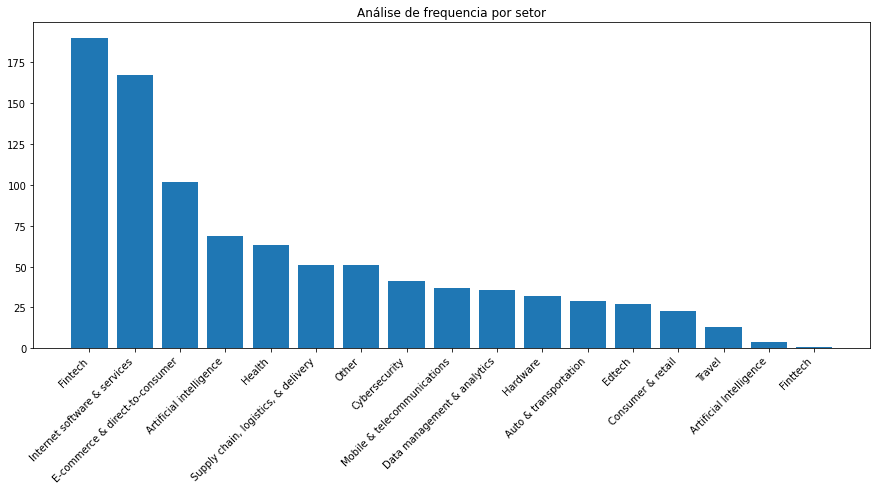

In [295]:
plt.figure(figsize=(15,6))
plt.title('Análise de frequencia por setor')
plt.bar(Banco_Dados['Setor'].value_counts().index, Banco_Dados['Setor'].value_counts())
#se o eixo x, ficar tumultuado, basta inseir xticks, para reaoclocar os nome, primeiro a rotação (rotation), depois
# aplica-se o ha, que é o lado dessa inclinação do rotation
plt.xticks(rotation=45, ha ='right');

In [296]:
Banco_Dados['Pais'].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Indonesia', 'Germany', 'Mexico',
       'Canada', 'Turkey', 'South Korea', 'Netherlands', 'Israel',
       'Colombia', 'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria',
       'Ireland', 'Singapore', 'Vietnam', 'United Arab Emirates',
       'Switzerland', 'Argentina', 'Spain', 'Japan', 'Luxembourg',
       'Nigeria', 'Santa Clara', 'Finland', 'Philippines', 'Denmark',
       'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Malaysia', 'Czech Republic', 'Croatia',
       'United States,', 'Indonesia,'], dtype=object)

In [297]:
Banco_Dados['Pais'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [298]:
Banco_Dados['Pais'].nunique()

47

In [299]:
Analise = round(Banco_Dados['Pais'].value_counts(normalize=True) * 100, 2)

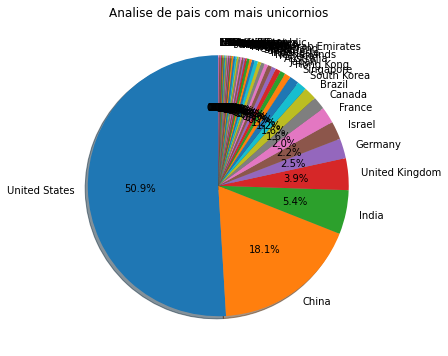

In [300]:
#grafico de pizza com todos os paises possuidores de unicornios
plt.figure(figsize=(15,6))
plt.title('Analise de pais com mais unicornios')
plt.pie(
    Analise,
    labels= Analise.index, #aparece o nome do pais/variavel no lado de fora
    shadow=True, 
    startangle=90, #angulo de inicio da rotação do gráfico de pizza, com 90, começa no segundo quadrante
    autopct='%1.1f%%' # coloca as procentagens dentro das fatias
);

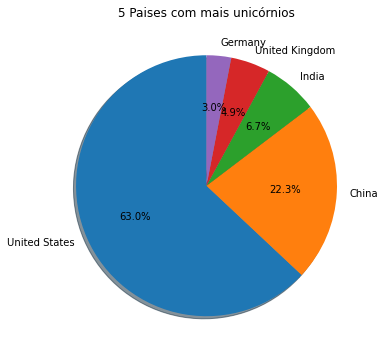

In [301]:
plt.figure(figsize=(15,6))
plt.title('5 Paises com mais unicórnios')
plt.pie(
    Analise.head(),
    labels=Analise.index[0:5],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

# Conversão para data

In [302]:
Banco_Dados['Data de Adesão'] = pd.to_datetime( Banco_Dados['Data de Adesão']) # a ideia é que por meio do datetime, seja feita a conversão de texto para data
Banco_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [303]:
Banco_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor ($)       936 non-null    object        
 3   Data de Adesão  936 non-null    datetime64[ns]
 4   Pais            936 non-null    object        
 5   Cidade          921 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    935 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 58.6+ KB


In [304]:
#extraindo mes e ano do banco de dados
Banco_Dados['Mes'] = pd.DatetimeIndex( Banco_Dados['Data de Adesão']).month
Banco_Dados['Ano'] = pd.DatetimeIndex( Banco_Dados['Data de Adesão']).year

In [305]:
Banco_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [306]:
#tabela análitica
Analise_Agrupada = Banco_Dados.groupby(by=['Pais', 'Ano', 'Mes']).count()['Id'].reset_index()
Analise_Agrupada.head()

,Pais,Ano,Mes,Id
0,Argentina,2021,8,1
1,Australia,2018,1,1
2,Australia,2019,3,1
3,Australia,2021,5,1
4,Australia,2021,7,2


In [307]:
#filtrar pelo pais brasil
#para essa tarefa aplica-se o loc que serve para resgatar dados de uma coluna, baseado na labels
#usa colchete
Analise_Agrupada.loc[Analise_Agrupada['Pais'] == 'Brazil']

,Pais,Ano,Mes,Id
11,Brazil,2018,3,1
12,Brazil,2018,7,1
13,Brazil,2018,11,1
14,Brazil,2019,6,1
15,Brazil,2019,9,1
16,Brazil,2019,10,1
17,Brazil,2019,12,1
18,Brazil,2020,1,1
19,Brazil,2020,12,2
20,Brazil,2021,1,1


In [308]:
# TRANSFORMANDO A COLUNA VALOR.
#tirar o cifrão nos valores da coluna "valor"
#usando replace de forma isolada não deu certo. Banco_Dados['Valor ($)'].replace("$", "")
#apply (código do pandas) - mexer dentro de uma coluna, consegue percorrer linha por linha e modificar o que se pede
#dentro do apply usou a função lambda
Banco_Dados['Valor ($)'] = pd.to_numeric( Banco_Dados['Valor ($)'].apply( lambda teste1: teste1.replace('$', ''))) 

Banco_Dados.head()
#pd.to_numeric - transformando em um tipo numerico, pode ser float ou int
# assim, para o dataframe original receber tais mudança, basta coloca-se como o recebedor com a coluna valor.

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [309]:
#No caso, transformou em um float

In [310]:
#Qaundo fui fazer a substituição dos antigos valores da coluna "Valor ($)", acabei digitand errado e criei uma nova coluna
#tentei por remove, mas esse código tira um item especifico digitado em uma lista, por exemplo
#tentei tbem pop, é bem parecido com o de cima, mas ao inves de digitar o nome do item a ser retirado, digita-se a casa em que o mesmo se encontra
#por fim, deu certo com drop pois retiraria a coluna inteira
# o axis tem o 0 e 1, onde 0 é linha, e 1, coluna
#Banco_Dados.drop(['Valor ($'], axis=1)

In [311]:
Banco_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [312]:
#o que foi feito?
#foi filtrado inicialmente pais e setor (foi tirado), onde foi feito uma somatória tendo como base o valor ($)
#reset_index serve para reiniciar o indice
Analise_pais = Banco_Dados.groupby(by=['Pais']).sum()['Valor ($)'].reset_index()
Analise_pais.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [313]:
#aqui a intenção era o de apresentar a linha do menor para o maior
Analise_pais.sort_values('Valor ($)')
#nota-se a existencia de limpeza nos dados, pois indonesia e eua está com virgula

,Pais,Valor ($)
10,Croatia,1.00
45,"United States,",1.00
20,"Indonesia,",1.00
11,Czech Republic,1.20
26,Malaysia,1.30
7,Chile,1.50
4,Bermuda,1.60
33,Senegal,1.70
32,Santa Clara,2.00
29,Nigeria,2.00


In [314]:
#do maior para o menor, usa-se ascending
Analise_pais.sort_values('Valor ($)', ascending=False)

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


In [315]:
Analise_valor = Analise_pais.sort_values('Valor ($)', ascending=False)
Analise_valor.head()

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


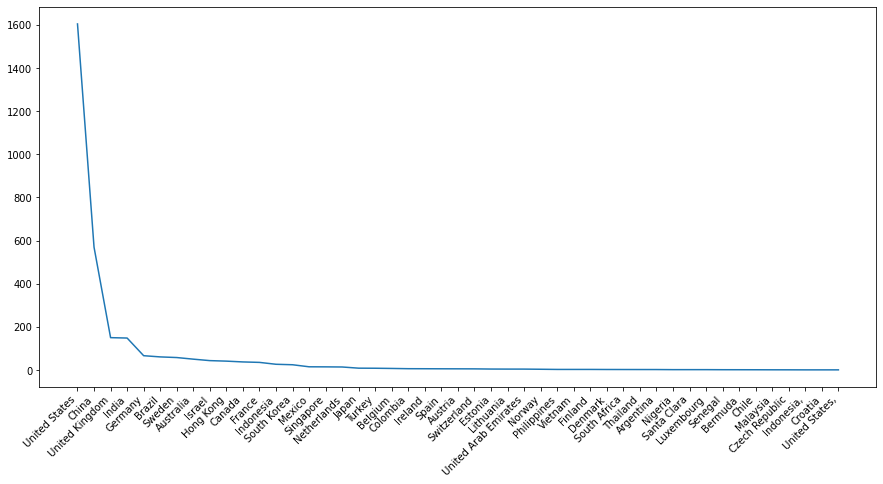

In [316]:
#repassando o dataframe acima
plt.figure(figsize=(15,7))
plt.plot(Analise_valor['Pais'], Analise_valor['Valor ($)'])
plt.xticks(rotation=45, ha='right');

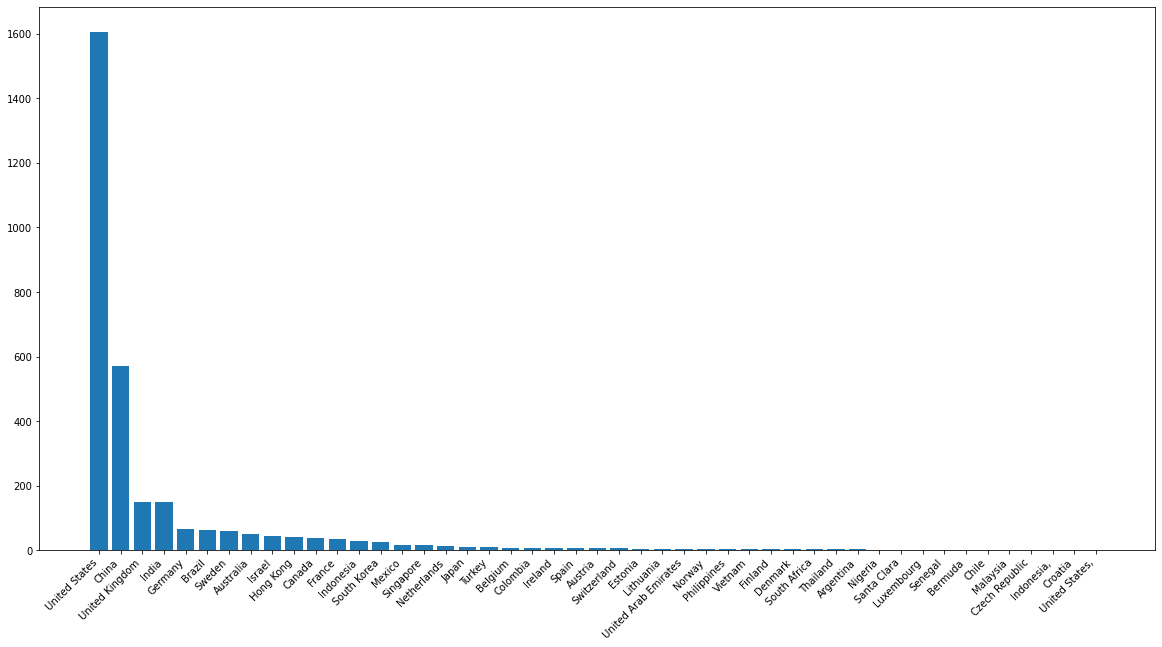

In [317]:
plt.figure(figsize=(20,10))
plt.bar(Analise_valor['Pais'], Analise_valor['Valor ($)'])
plt.xticks(rotation=45, ha='right');

# Meu teste

In [318]:
#tentando arrumar a , na coluna pais
Banco_Dados['Pais'] = Banco_Dados['Pais'].apply(lambda linhateste: linhateste.replace(",", ""))

In [319]:
Banco_Dados['Pais'].nunique()

45

In [320]:
Banco_Dados['Pais'].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Indonesia', 'Germany', 'Mexico',
       'Canada', 'Turkey', 'South Korea', 'Netherlands', 'Israel',
       'Colombia', 'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria',
       'Ireland', 'Singapore', 'Vietnam', 'United Arab Emirates',
       'Switzerland', 'Argentina', 'Spain', 'Japan', 'Luxembourg',
       'Nigeria', 'Santa Clara', 'Finland', 'Philippines', 'Denmark',
       'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Malaysia', 'Czech Republic', 'Croatia'], dtype=object)

In [325]:
fazendograficodisso = Banco_Dados.groupby(by=['Pais']).count()['Id'].reset_index()

In [333]:
graficonovo = fazendograficodisso.sort_values('Id', ascending=False)

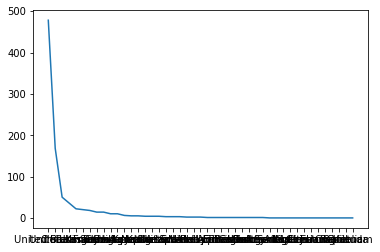

In [335]:
plt.plot(graficonovo['Pais'], graficonovo['Id'])